In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
from statsmodels.graphics.factorplots import interaction_plot
import plotly.express as px
import pywedge as pw
from     datetime                 import datetime
import matplotlib.pyplot as     plt

In [2]:
df=pd.read_csv('Forecast.csv')

In [3]:
df.head()

,product,date,city,sales
0,Mixers,04-01-2014,Mumbai,2679347
1,Mixers,05-01-2014,Mumbai,3864612
2,Mixers,06-01-2014,Mumbai,2932658
3,Mixers,07-01-2014,Mumbai,3703713
4,Mixers,08-01-2014,Mumbai,3931029


In [4]:
df.isnull().sum()

product    0
date       0
city       0
sales      0
dtype: int64

In [5]:
df.head()

,product,date,city,sales
0,Mixers,04-01-2014,Mumbai,2679347
1,Mixers,05-01-2014,Mumbai,3864612
2,Mixers,06-01-2014,Mumbai,2932658
3,Mixers,07-01-2014,Mumbai,3703713
4,Mixers,08-01-2014,Mumbai,3931029


In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 4 columns):
product    4800 non-null object
date       4800 non-null datetime64[ns]
city       4800 non-null object
sales      4800 non-null int64
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 150.1+ KB


In [43]:
import datetime

In [44]:
df['date'] = df["date"].dt.strftime("%m-%d-%y")

In [45]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    fig = px.histogram(df, x= column)
    fig.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    fig = px.box(df, x= column)
    fig.show()
    
    

In [46]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

1

In [47]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20);

Description of sales
----------------------------------------------------------------------------
count    4.800000e+03
mean     7.415188e+05
std      1.308447e+06
min      0.000000e+00
25%      1.171152e+05
50%      3.077215e+05
75%      7.796660e+05
max      1.588133e+07
Name: sales, dtype: float64 Distribution of sales
----------------------------------------------------------------------------


BoxPlot of sales
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [48]:
df_num.skew()

sales    4.596524
dtype: float64

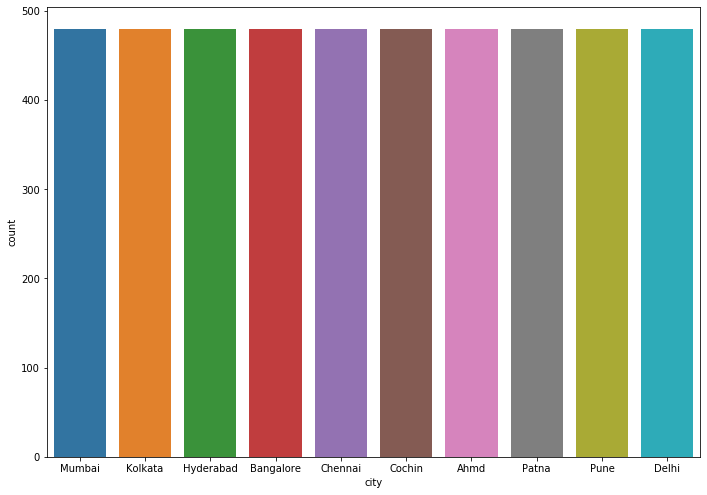

In [15]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x="city", data=df, ax=ax);

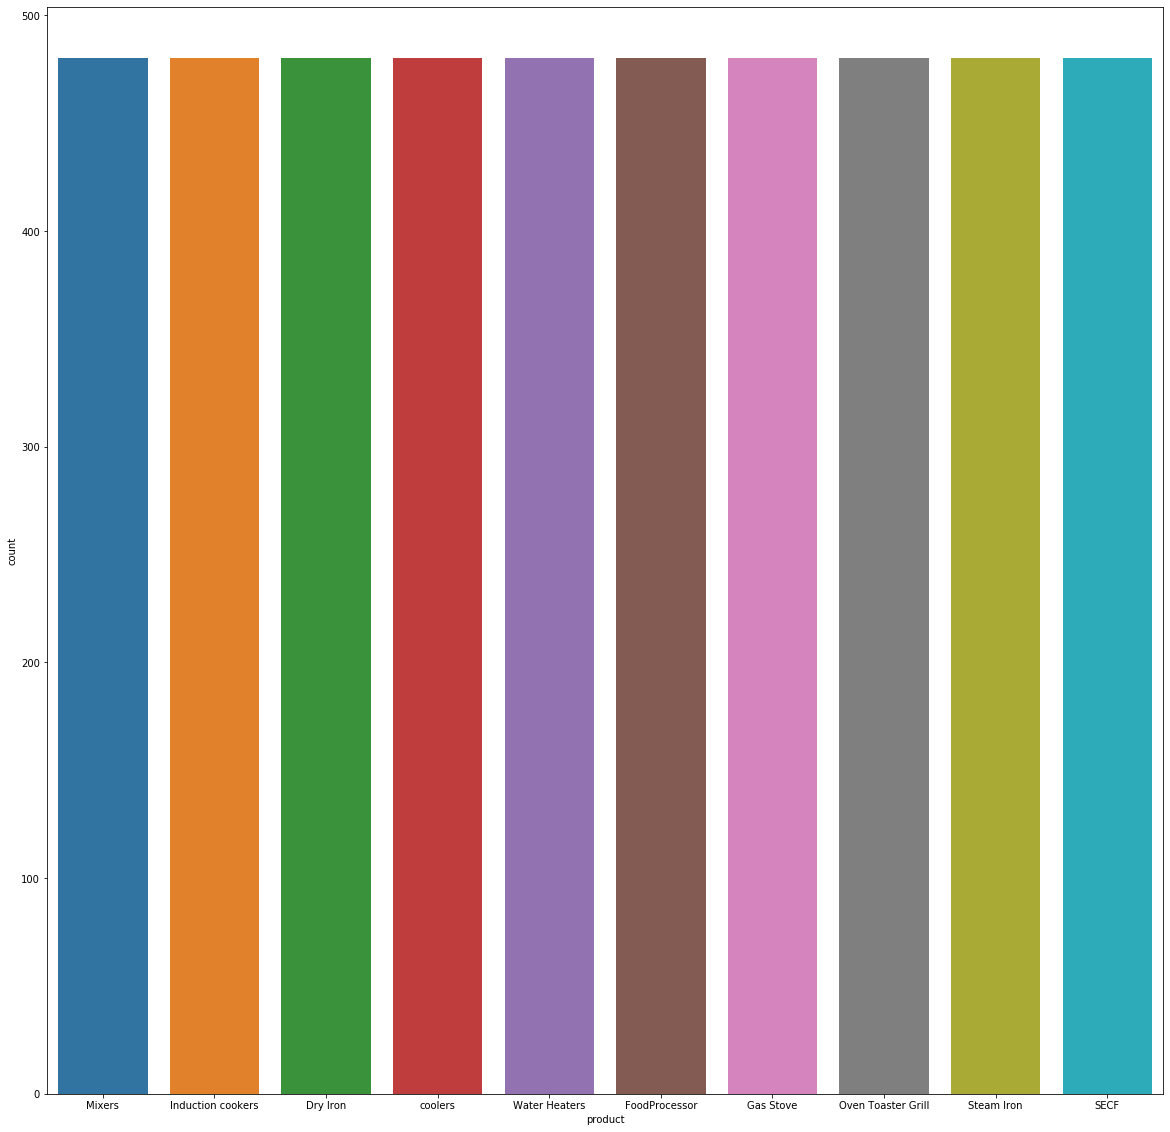

In [16]:
a4_dims = (20, 20)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x="product", data=df, ax=ax);

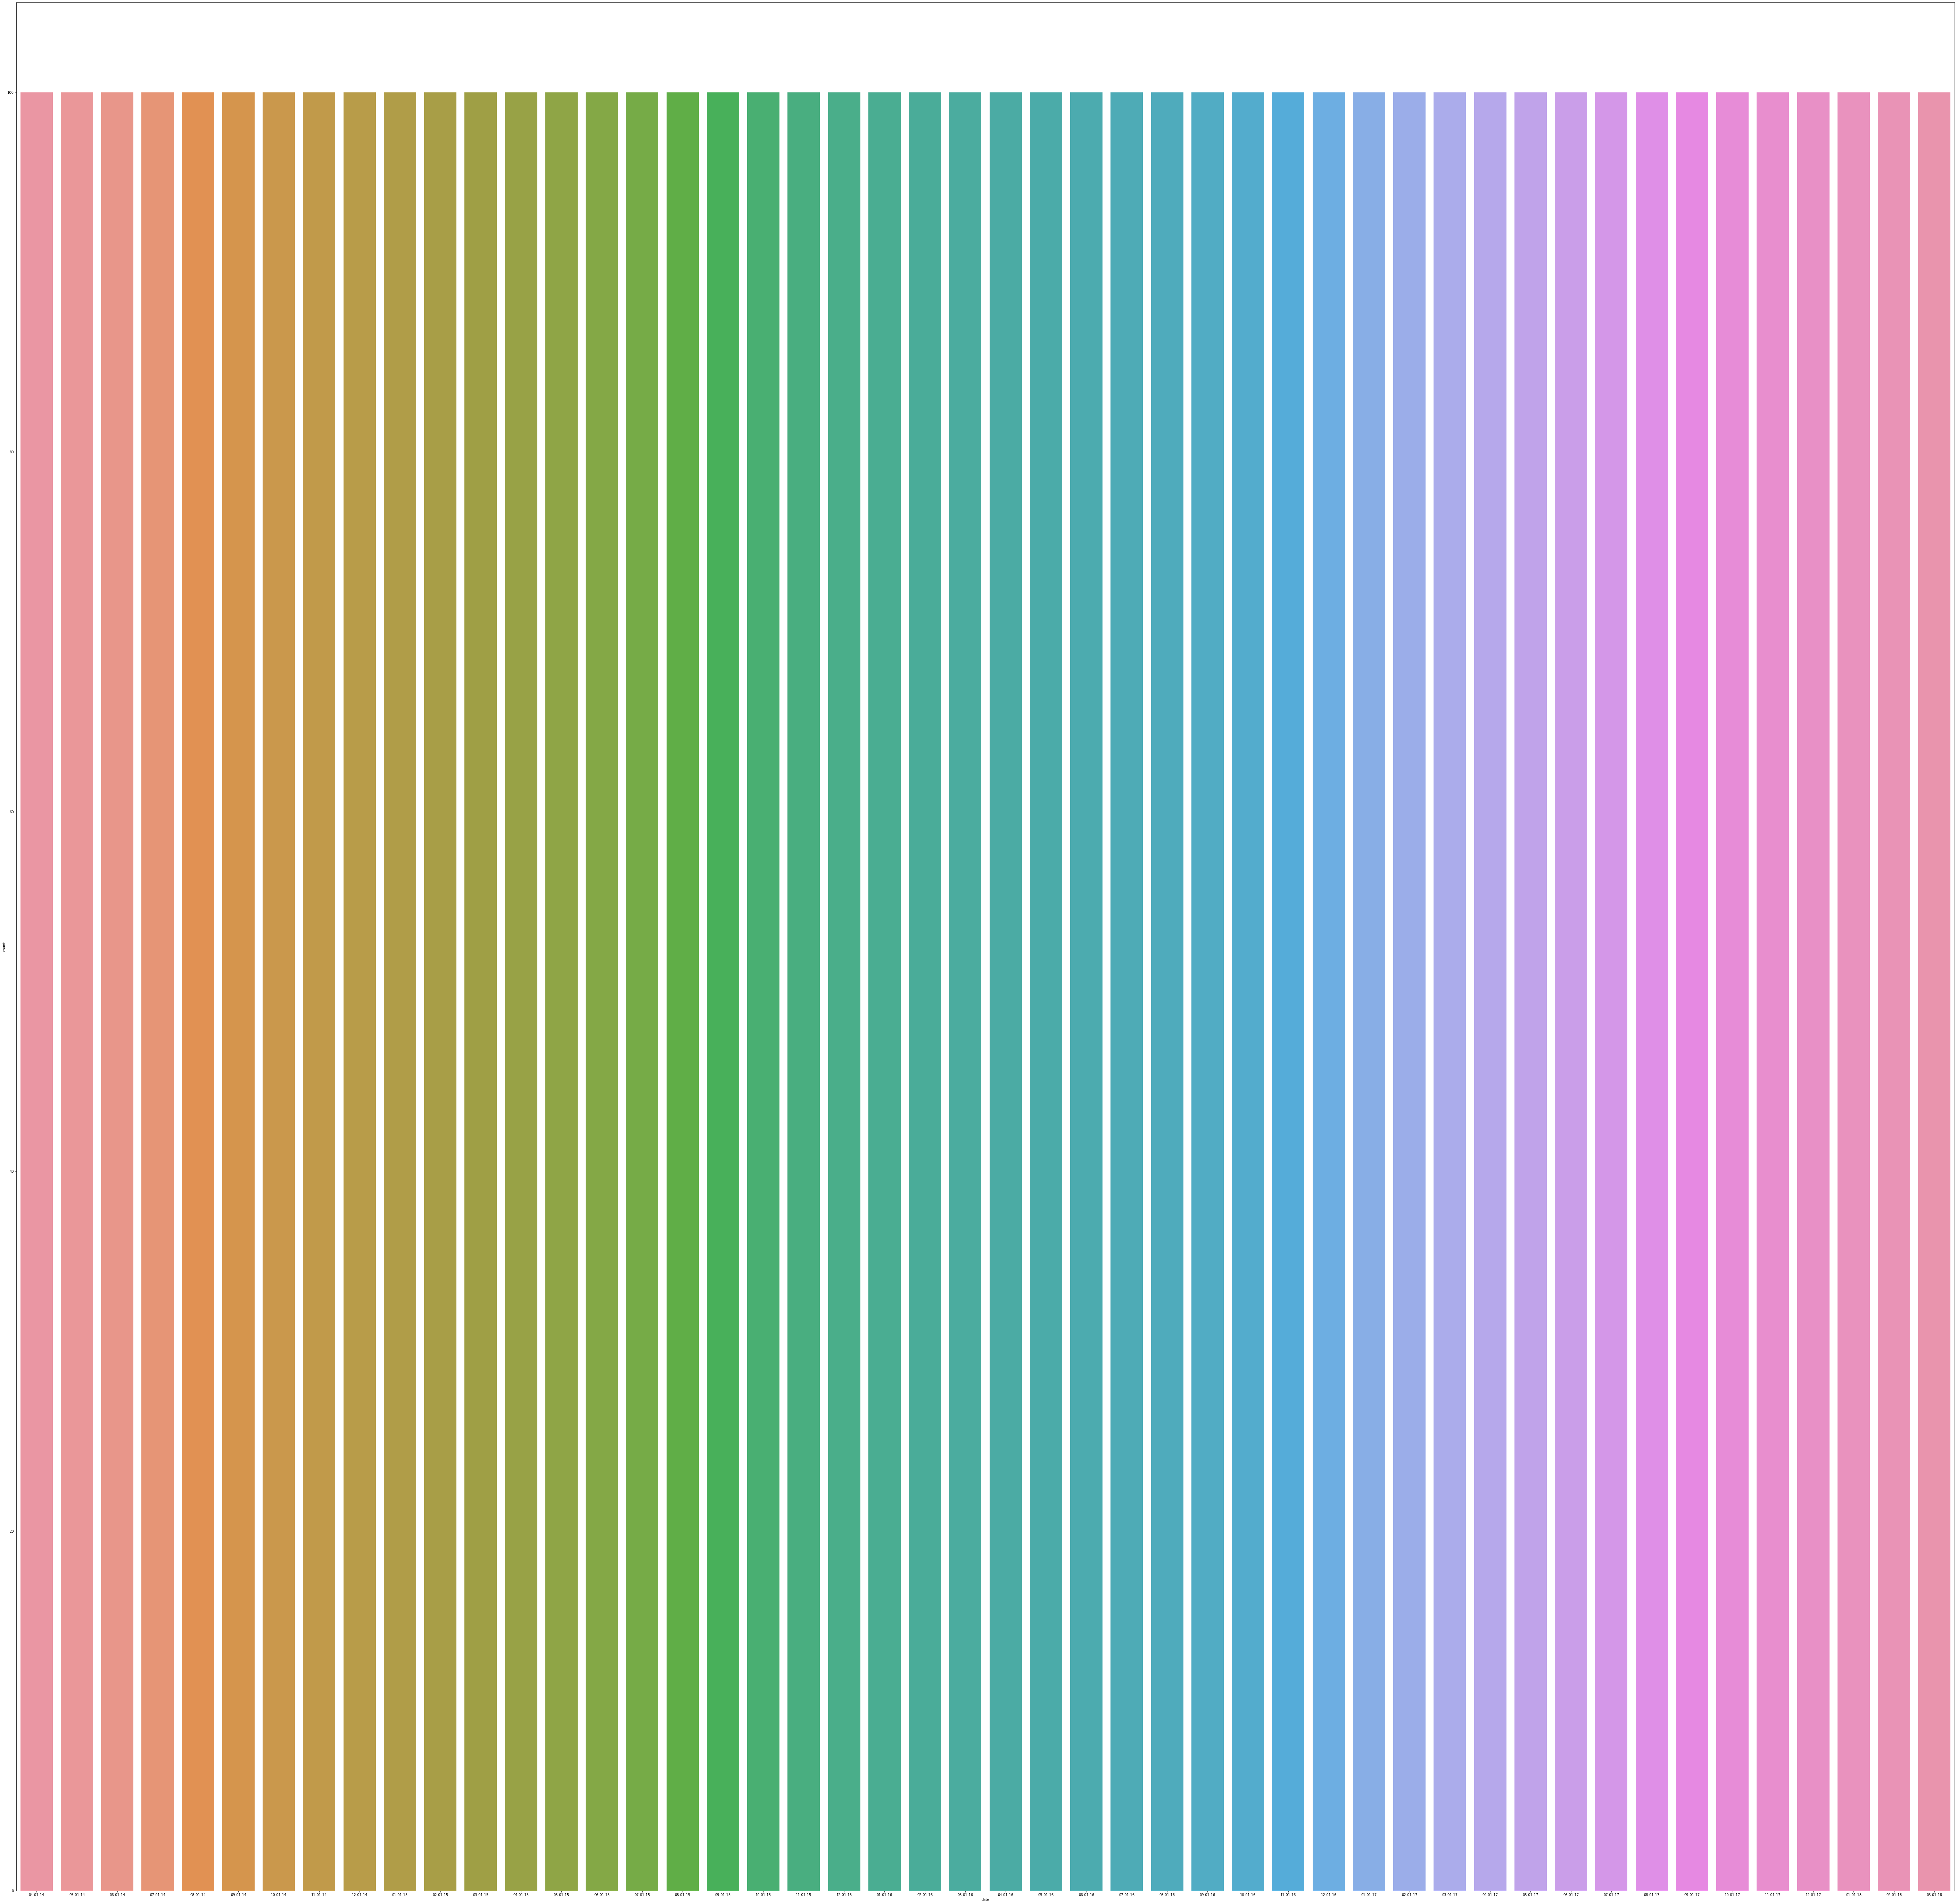

In [17]:
a4_dims = (100,100)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x="date", data=df, ax=ax);

In [64]:
df.to_excel(r'D:\Great lakes\Capstone\Forecasting Project\Forecaste.xlsx', index = False)

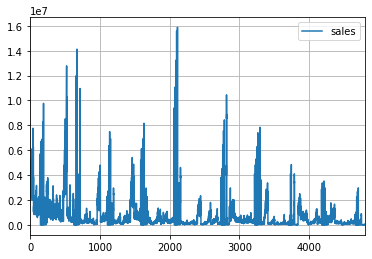

In [62]:
df.plot()
plt.grid();

In [67]:
df1=pd.read_csv('Forecast.csv',parse_dates = True, index_col = 'date')

In [82]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 40,40

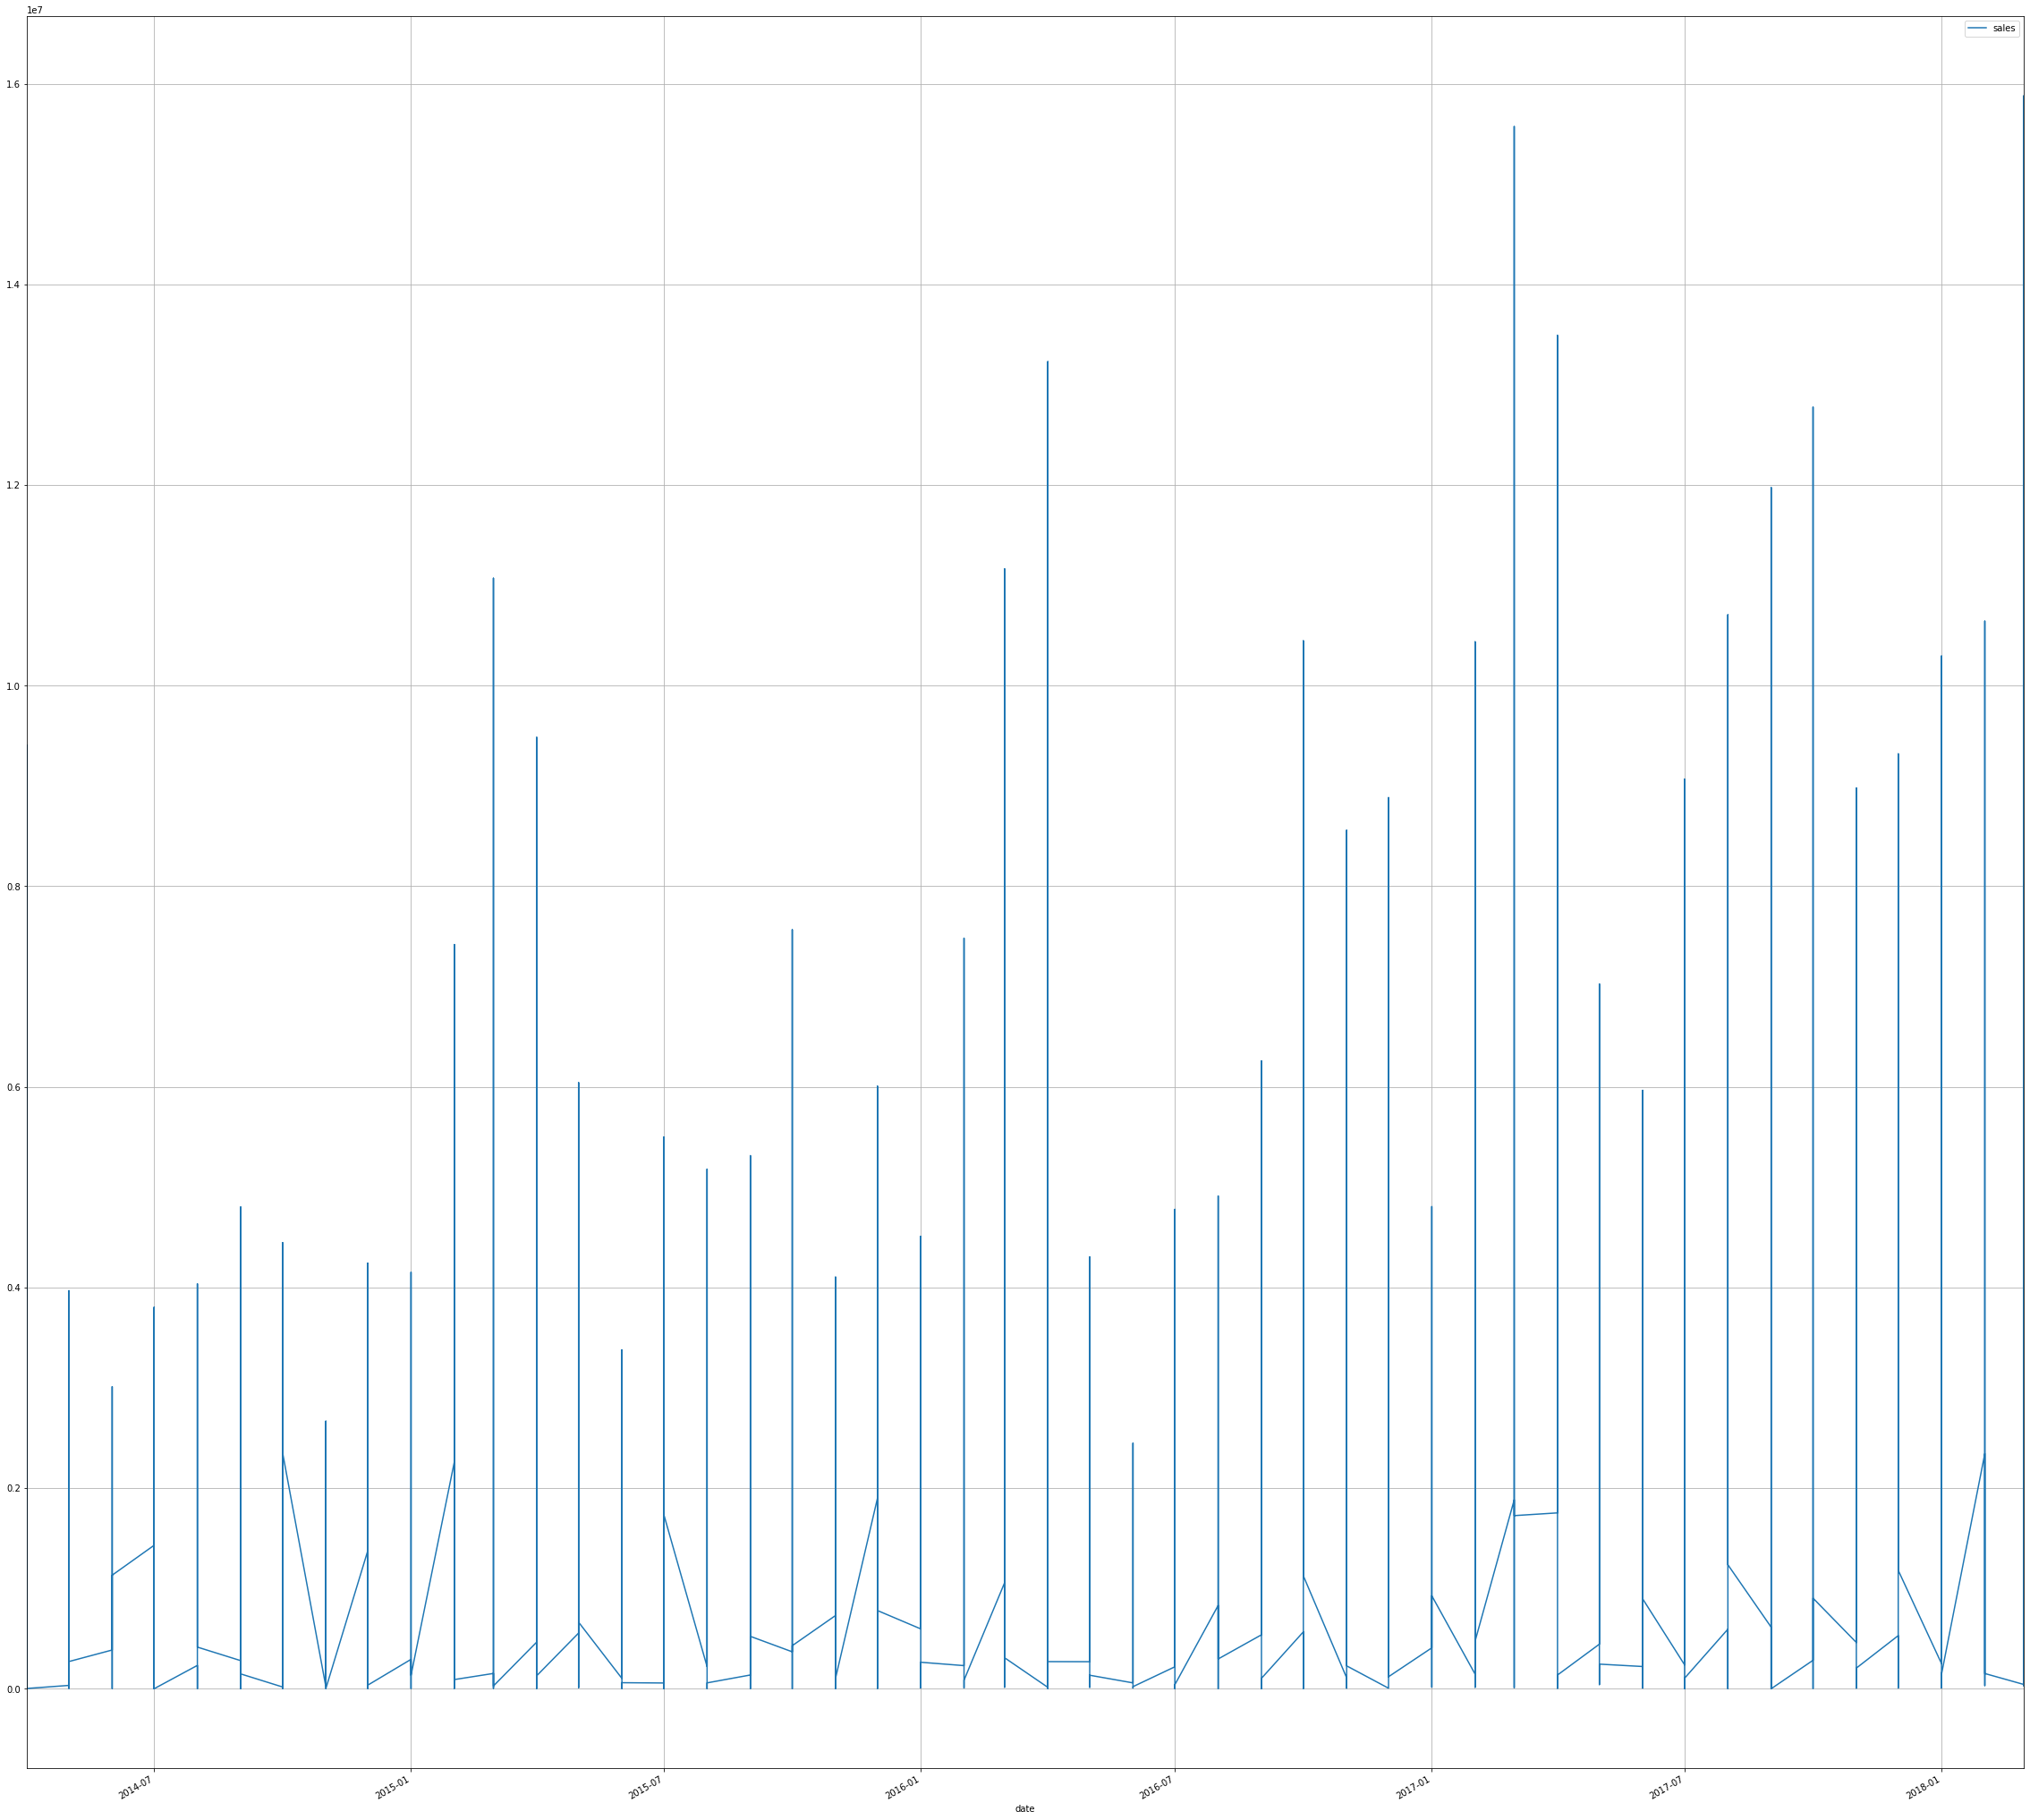

In [92]:
df1.plot()
plt.grid();

In [84]:
df1['sales'] = df1['sales'].astype(float)

In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4800 entries, 2014-04-01 to 2018-03-01
Data columns (total 3 columns):
product    4800 non-null object
city       4800 non-null object
sales      4800 non-null float64
dtypes: float64(1), object(2)
memory usage: 150.0+ KB


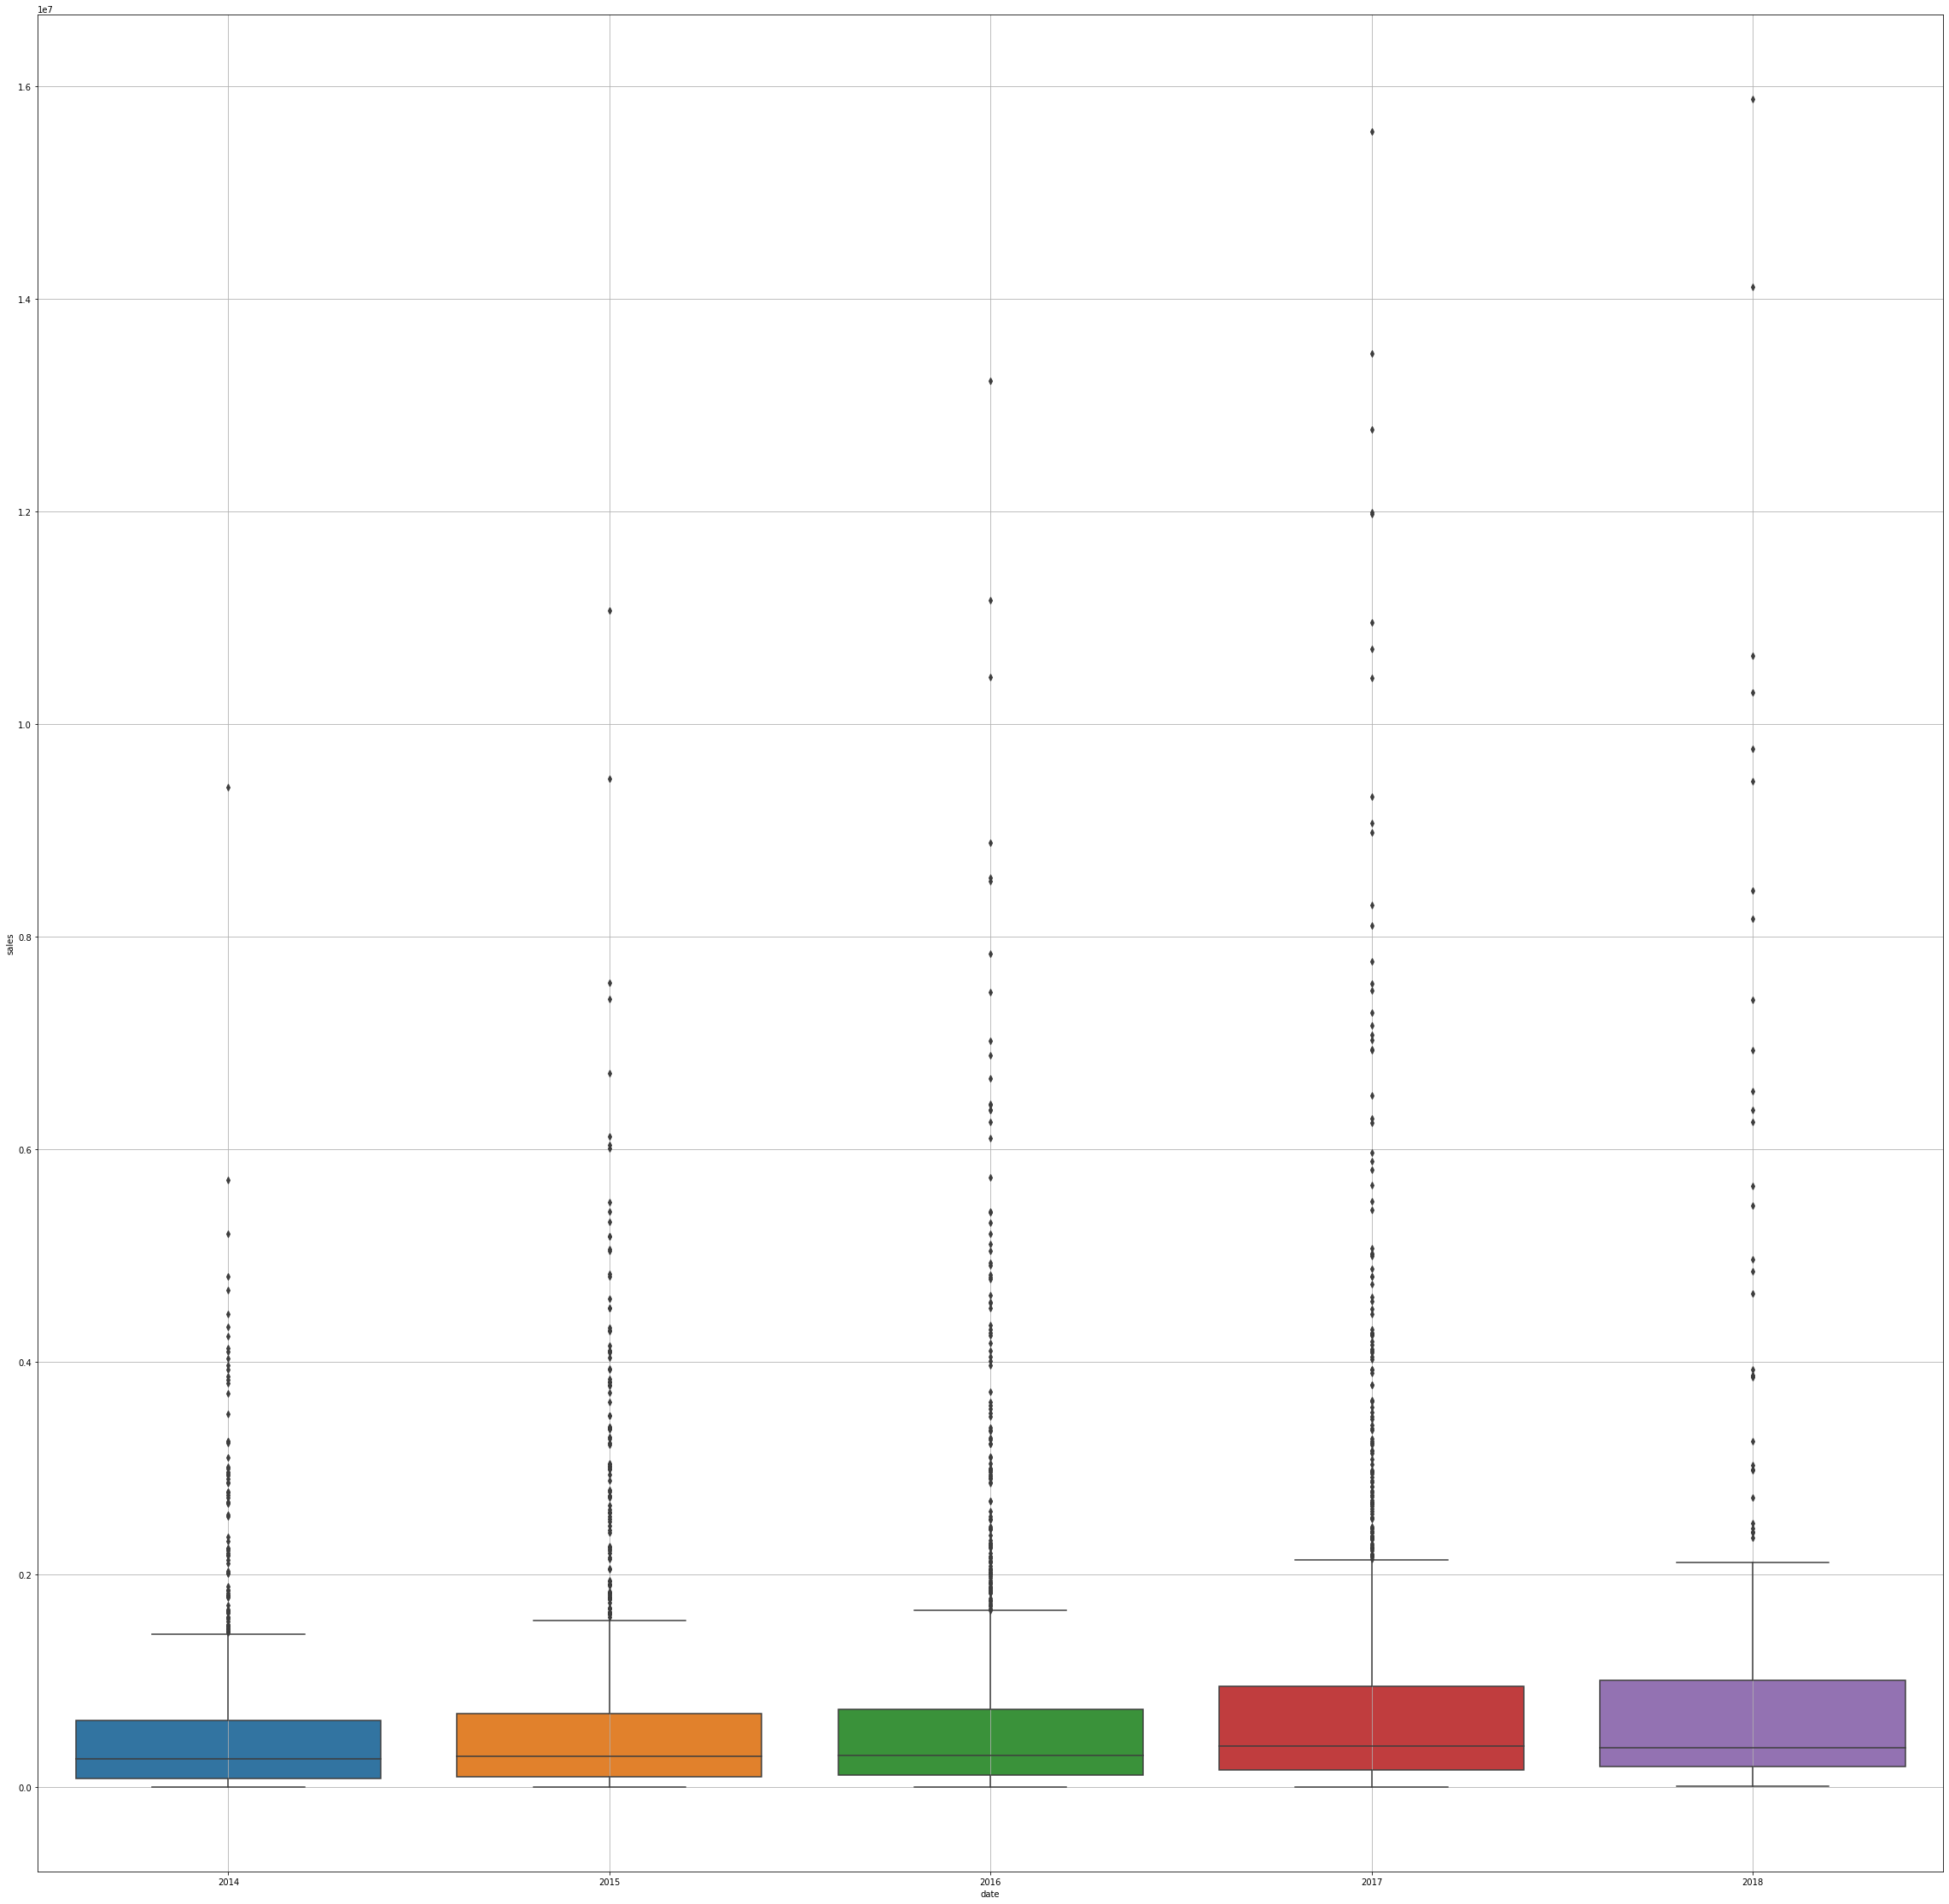

In [86]:
sns.boxplot(x = df1.index.year,y = df['sales'])
plt.grid();

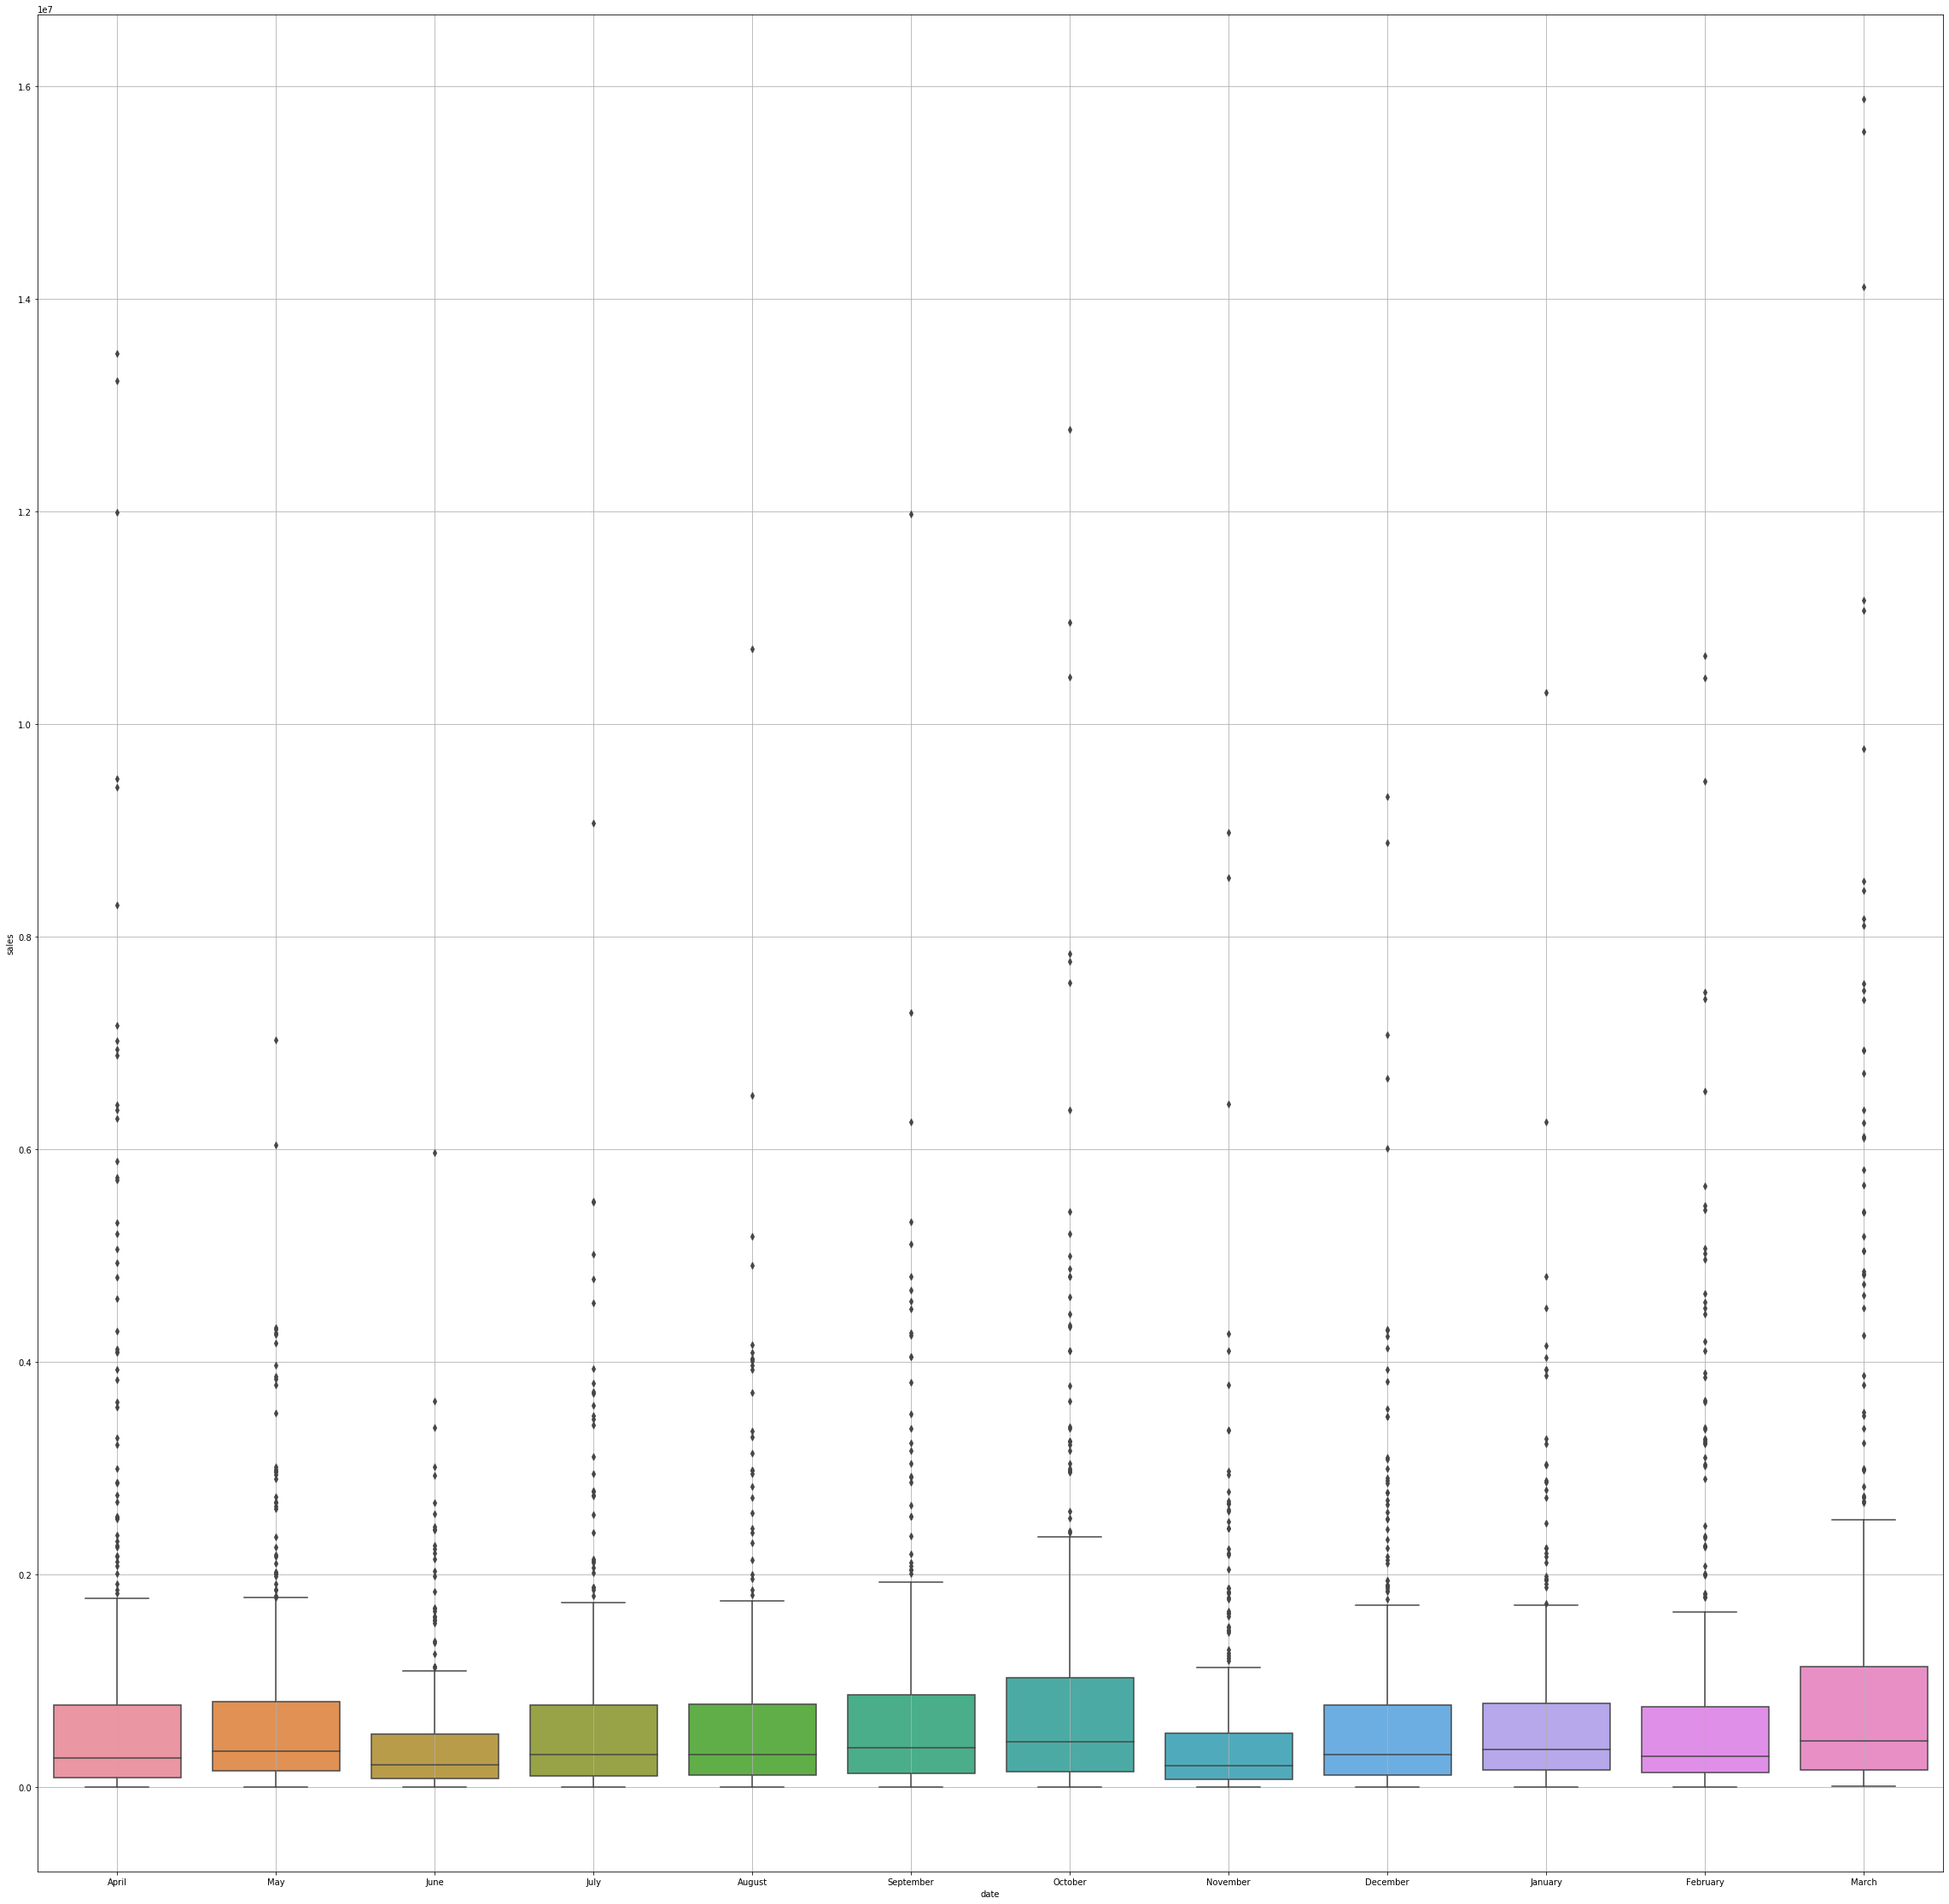

In [87]:
sns.boxplot(x = df1.index.month_name(),y = df1['sales'])
plt.grid();

In [89]:
monthly_sales_across_years = pd.pivot_table(df, values = 'sales', columns = df1.index.month, index = df1.index.year)
monthly_sales_across_years

date,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
2014,NaN,NaN,NaN,668742.55,574005.99,380022.79,499216.46,514515.92,602927.63,651642.67,376612.96,608556.72
2015,563925.23,673783.29,1013884.26,772012.47,648174.78,339858.57,560758.33,519871.89,533117.83,831971.20,498186.52,671479.16
2016,490471.80,670827.42,1142118.89,1249443.34,633803.31,330192.81,616433.93,629727.49,773065.86,972123.07,535053.11,635116.45
2017,661150.45,893454.29,1343084.68,1029636.12,916768.21,615667.67,887860.21,932772.40,1048985.46,1308493.58,623829.29,874442.80
2018,894295.41,978819.97,1401997.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


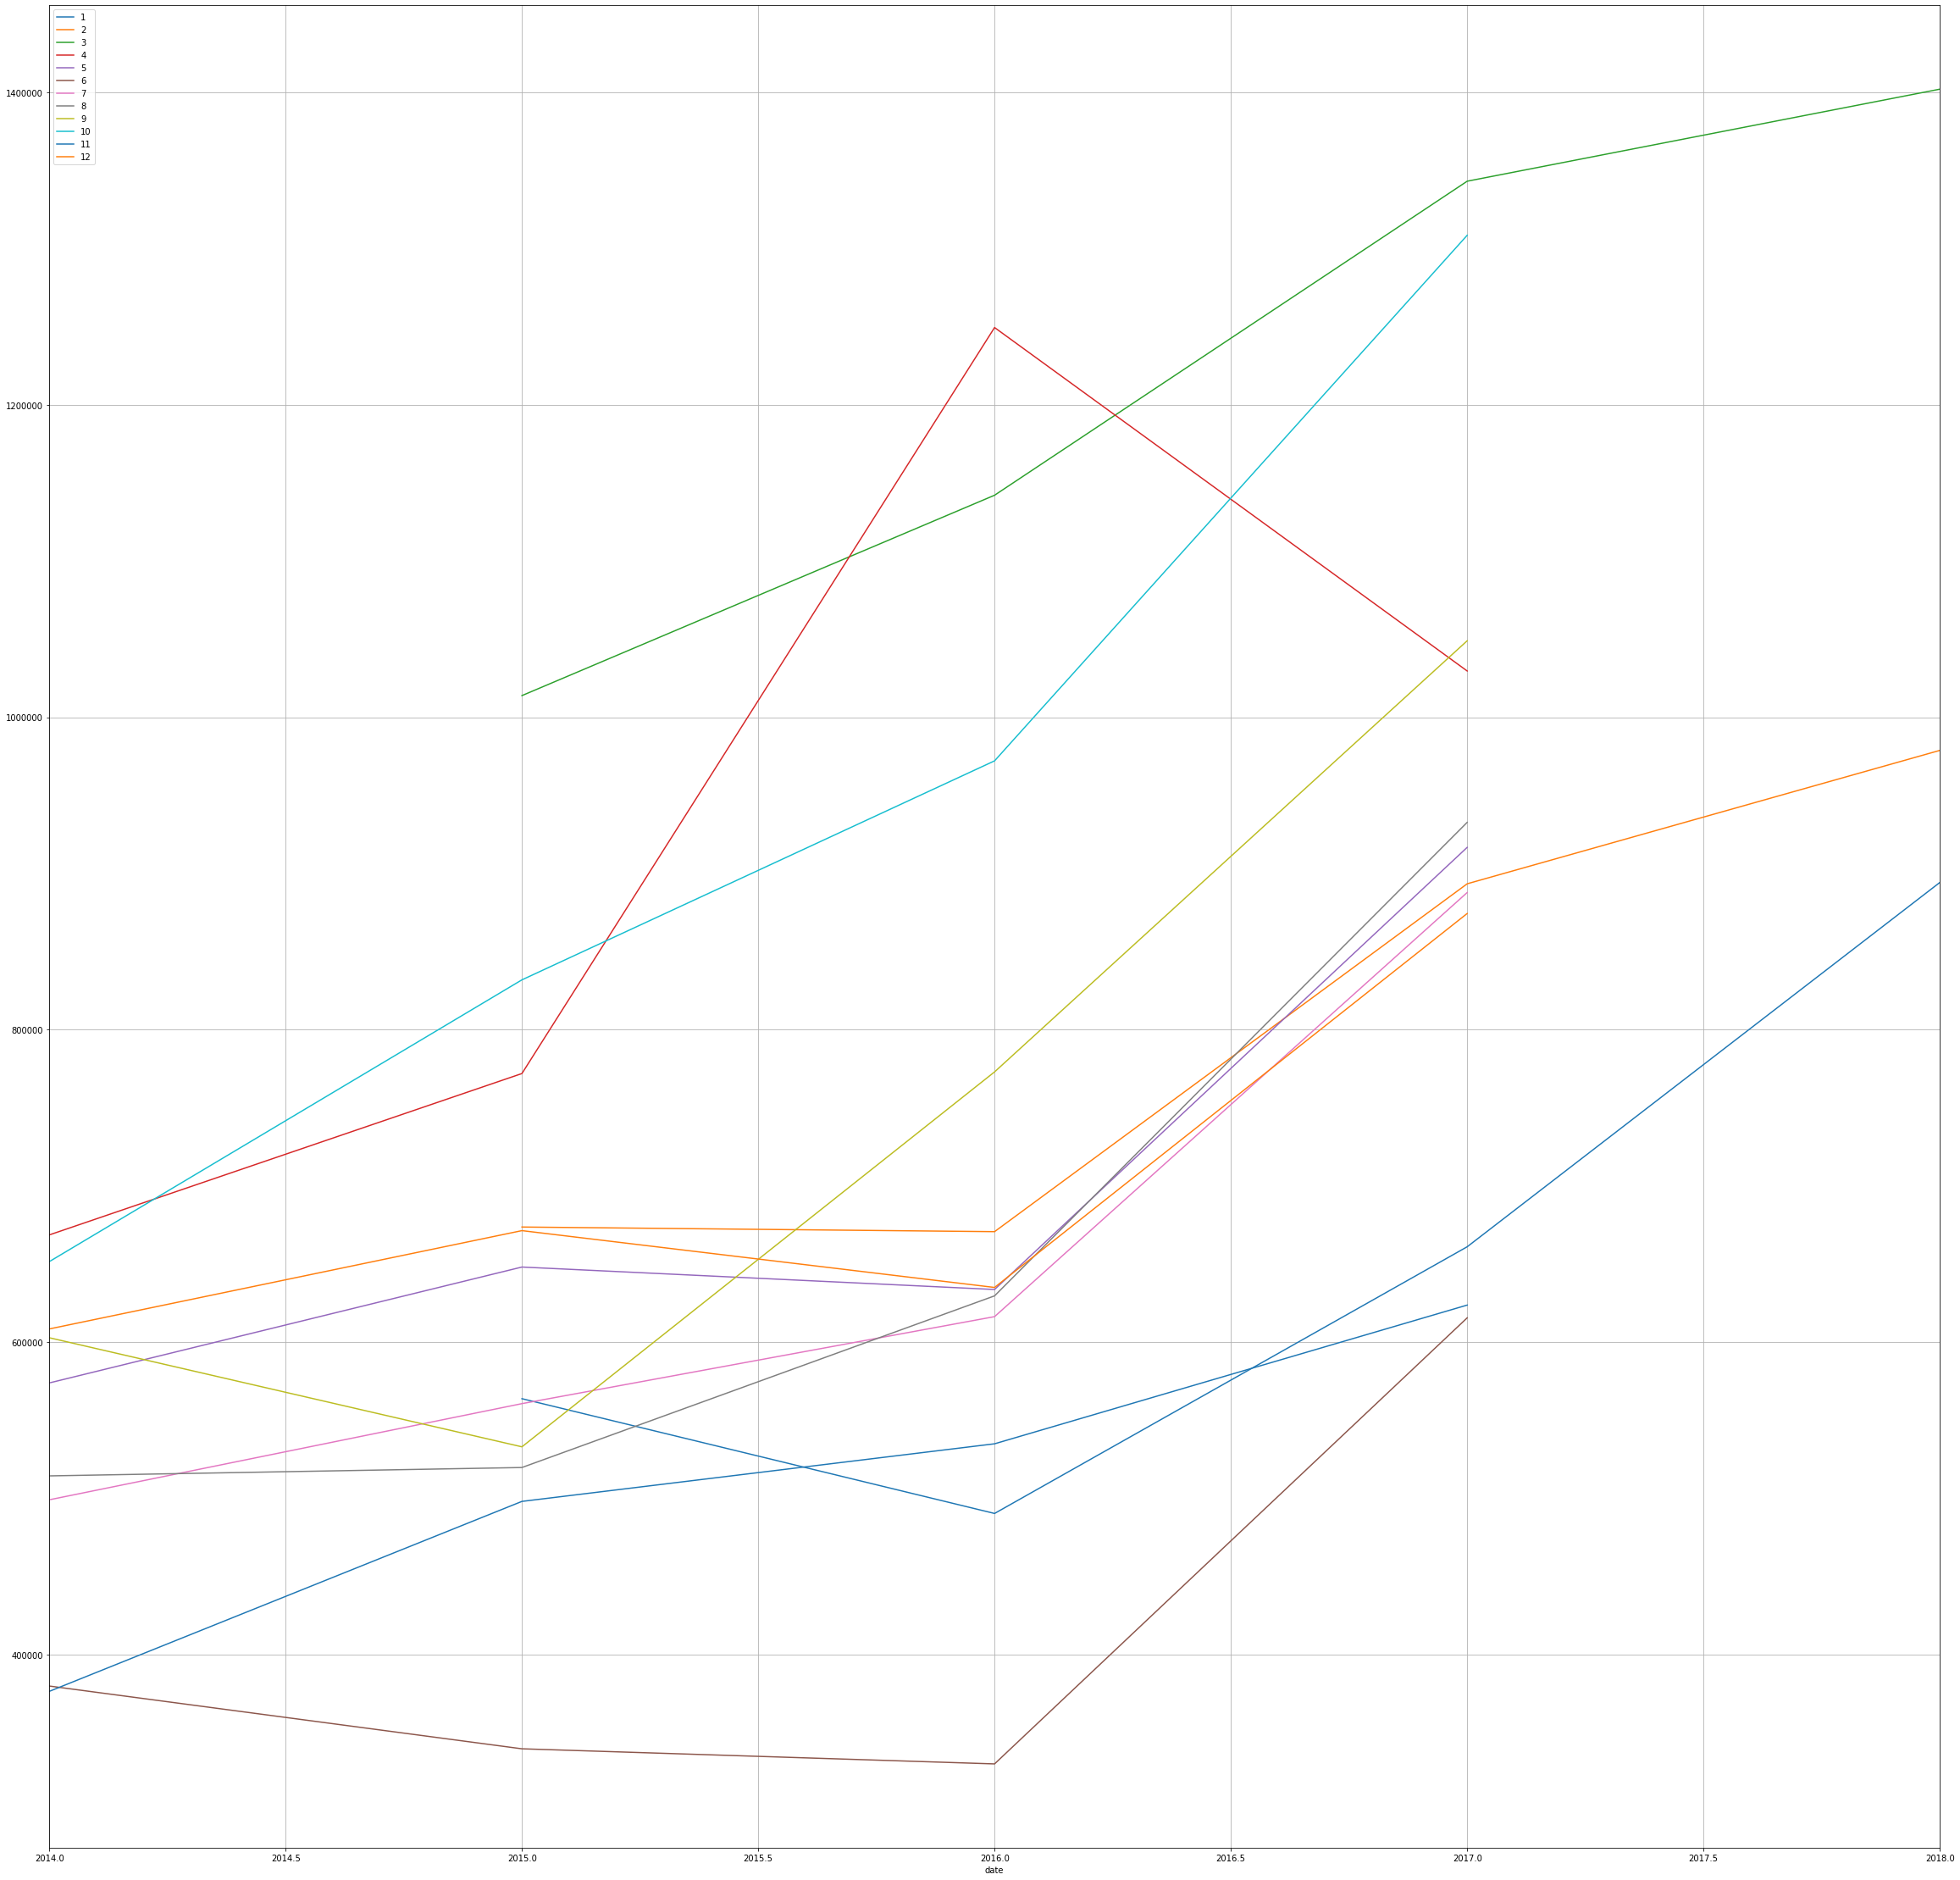

In [90]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

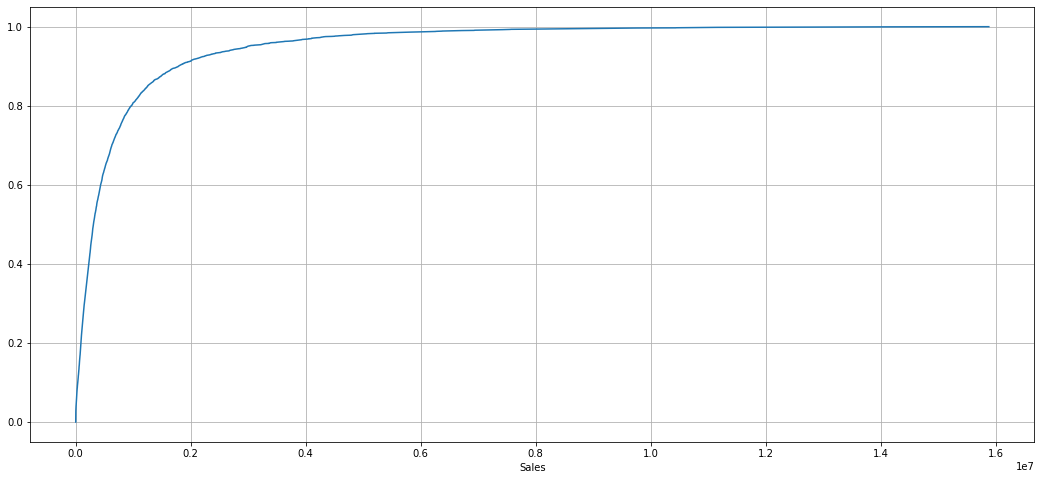

In [91]:
plt.figure(figsize = (18, 8))
cdf = ECDF(df1['sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

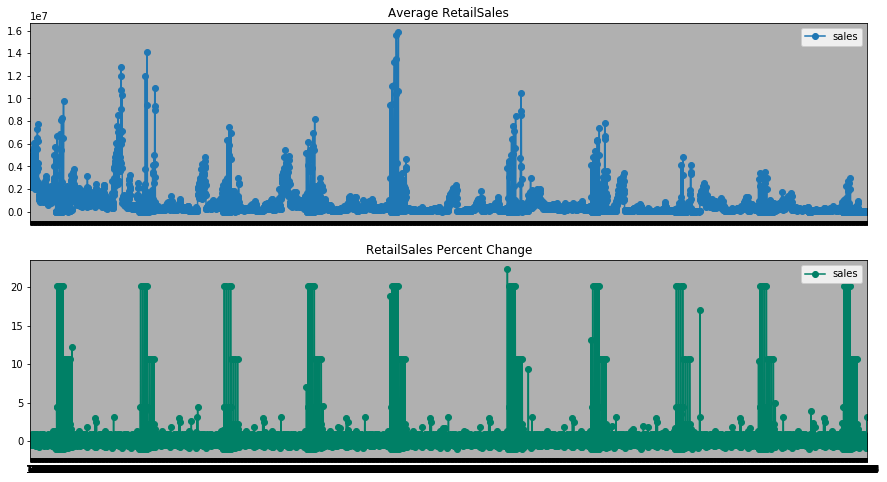

In [9]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["sales"].mean()
pct_change = df.groupby(df.index)["sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average RetailSales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="RetailSales Percent Change",grid=True)

In [10]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

In [11]:
df.describe()

,sales
count,4.800000e+03
mean,7.415188e+05
std,1.308447e+06
min,0.000000e+00
25%,1.171152e+05
50%,3.077215e+05
75%,7.796660e+05
max,1.588133e+07


In [13]:
interpolated = df.interpolate(method = 'linear')
interpolated.plot()
plt.show()

ValueError: view limit minimum -794066.4 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [ ]:
interpolated1 = df.interpolate(method = 'spline', order = 2)
interpolated1.plot()
plt.show()

In [39]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [40]:
df = pd.read_csv("Forecast.csv",parse_dates=True,squeeze=True,index_col=1)

In [41]:
df.head()

,product,city,sales
date,,,
2014-04-01,Mixers,Mumbai,2679347
2014-05-01,Mixers,Mumbai,3864612
2014-06-01,Mixers,Mumbai,2932658
2014-07-01,Mixers,Mumbai,3703713
2014-08-01,Mixers,Mumbai,3931029


In [42]:
Mixers = df.loc[df['product'] == 'Mixers']

In [18]:
Mixers['date'].min(), Mixers['date'].max()

KeyError: 'date'

In [19]:
Mixers = Mixers.groupby('date')['sales'].sum().reset_index()

In [20]:
Mixers = Mixers.set_index('date')
Mixers.index

DatetimeIndex(['2014-04-01', '2014-05-01', '2014-06-01', '2014-07-01',
               '2014-08-01', '2014-09-01', '2014-10-01', '2014-11-01',
               '2014-12-01', '2015-01-01', '2015-02-01', '2015-03-01',
               '2015-04-01', '2015-05-01', '2015-06-01', '2015-07-01',
               '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
               '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01',
               '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01',
               '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
               '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01',
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01'],
              dtype='datetime64[ns]', name='date', freq=None)

In [21]:
y = Mixers['sales'].resample('MS').mean()

In [22]:
y['2017':]

date
2017-01-01    21848167
2017-02-01    20239312
2017-03-01    31503559
2017-04-01    11807439
2017-05-01    23208909
2017-06-01    19705921
2017-07-01    29949832
2017-08-01    35366054
2017-09-01    39557160
2017-10-01    42201388
2017-11-01    14097690
2017-12-01    23392770
2018-01-01    34009378
2018-02-01    12733817
2018-03-01    21047277
Freq: MS, Name: sales, dtype: int64

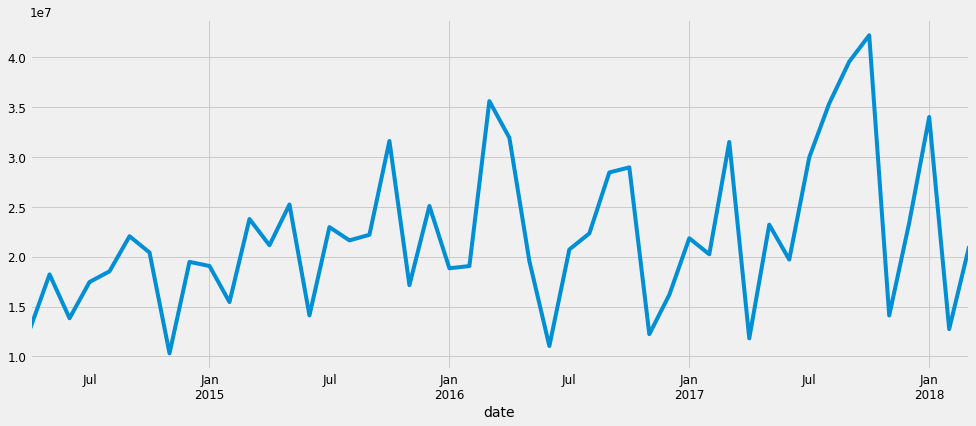

In [23]:
y.plot(figsize=(15, 6))
plt.show()

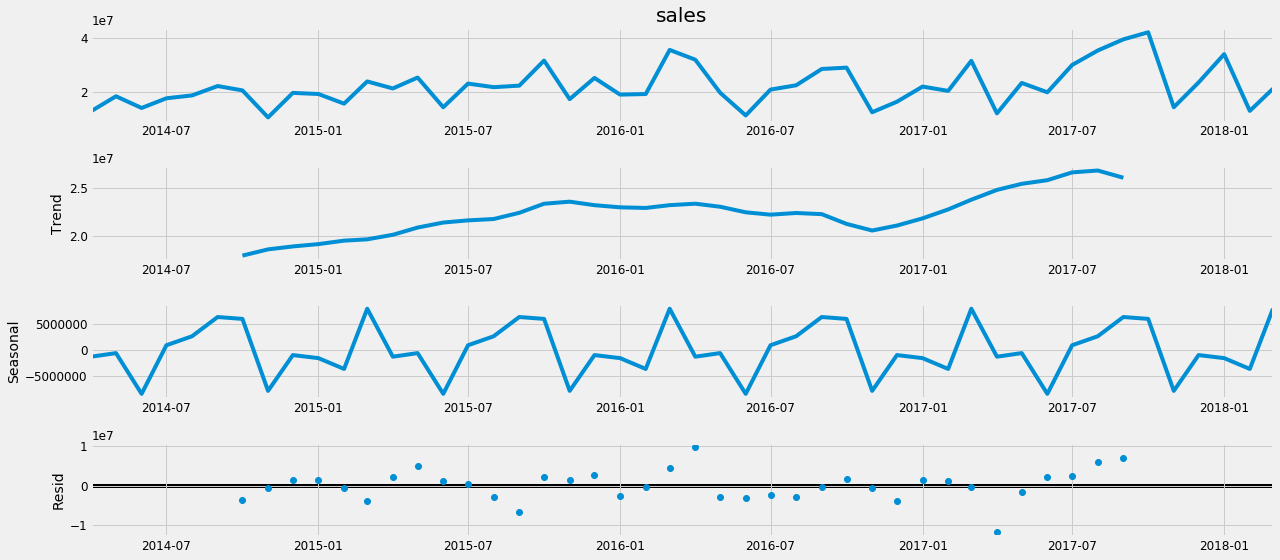

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [25]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [26]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1730.6302831926564
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4174227298.573899
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1214.9206711709728
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:801.2607471943513
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1248.1064045205392
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3727116021.52344
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:836.123674938548
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:800.9503849431269
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1669.7621346613842
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3842334445.70026
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1173.70094650836
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:764.08561741624
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1297.3496059680122
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3395225415.8218193
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:829.107140278667
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:763.2493114365158
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1611.787749670586
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:324911979.24656796
ARIMA(0, 1

In [27]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5086      0.319      1.597      0.110      -0.116       1.133
ma.L1         -0.8655      0.185     -4.678      0.000      -1.228      -0.503
ar.S.L12      -0.2154      0.264     -0.815      0.415      -0.733       0.302
sigma2      6.117e+13   3.73e-15   1.64e+28      0.000    6.12e+13    6.12e+13


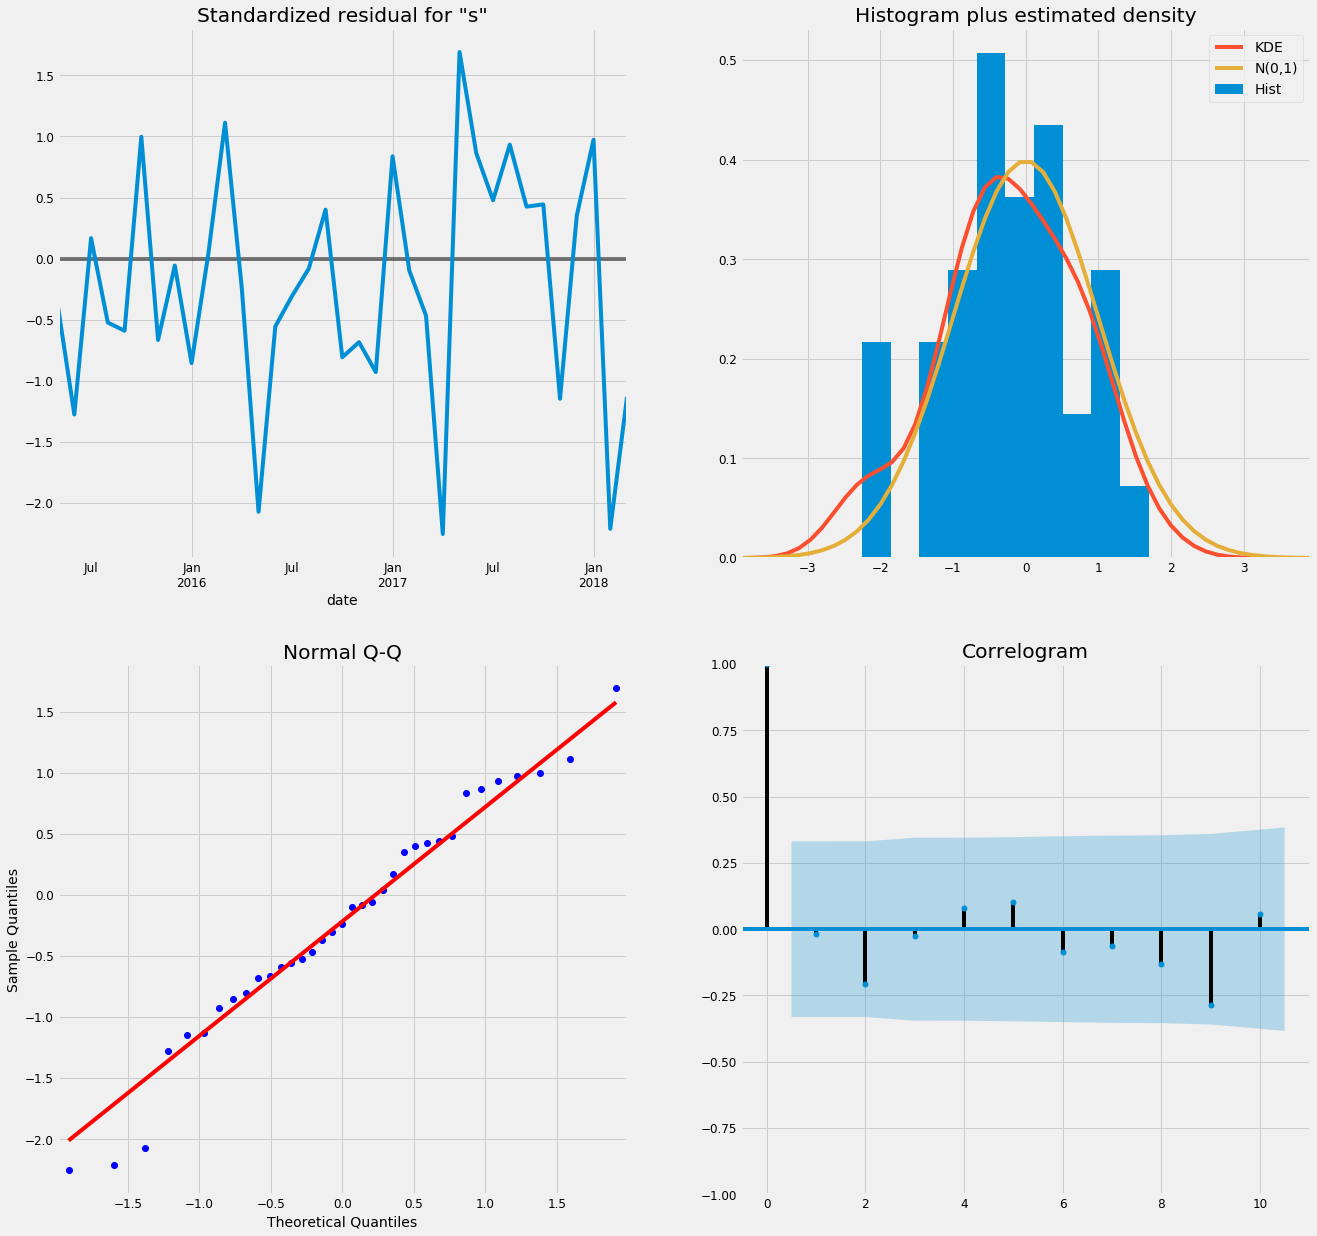

In [28]:
results.plot_diagnostics(figsize=(20,20))
plt.show()

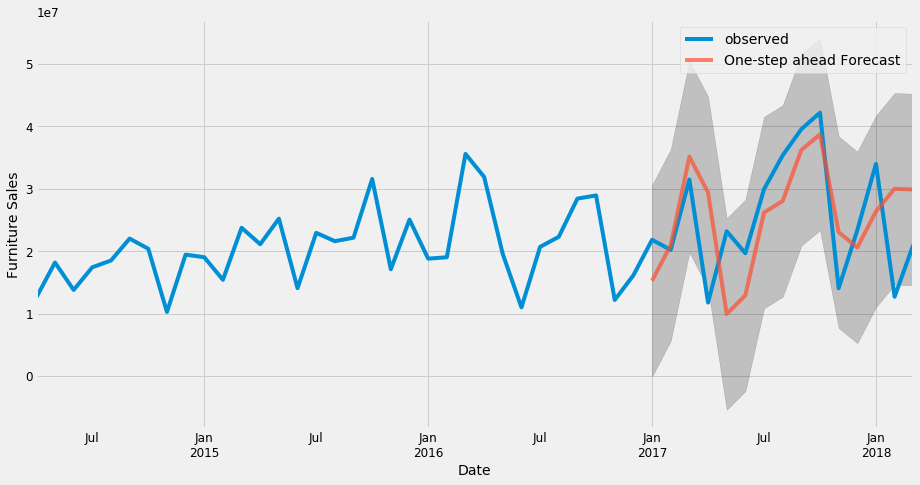

In [29]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [30]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 80118009269732.05


In [31]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

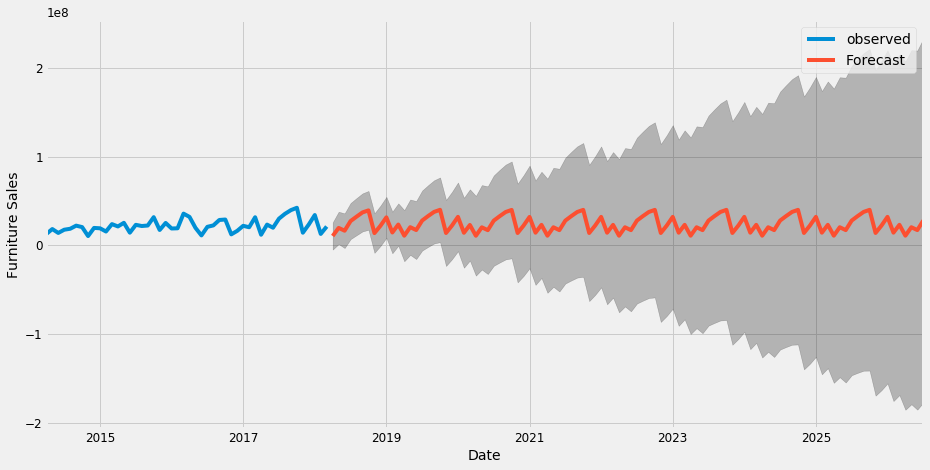

In [32]:
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [33]:
Mixers = df.loc[df['product'] == 'Mixers']
city = df.loc[df['city'] == 'Mumbai']
Mixers.shape, city.shape

((480, 3), (480, 3))

In [43]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

In [44]:
df.head()

,product,city,sales
date,,,
2014-04-01,Mixers,Mumbai,2679347
2014-05-01,Mixers,Mumbai,3864612
2014-06-01,Mixers,Mumbai,2932658
2014-07-01,Mixers,Mumbai,3703713
2014-08-01,Mixers,Mumbai,3931029


In [37]:
df['date'] = pd.to_datetime(df['date'])
df_model = df.set_index('date')
df_model.drop(['date'], axis=1, inplace=True)
df_model.tail()

KeyError: 'date'